**Multiclassification of Recyclable Materials in the TrashNet Dataset Using the ResNet-152 Approach**

The problem is quite clear, we all are more concerned with recycling and waste materials which are very harmful for our society. If we talk about the amount of waste, the world produces at least 5 million tons of waste per day and this number is increasing day by day, so we need to be conscious about recycle. This model helps us to classify recycle into 6 different waste materials, it will show you the details of that particular waste material. This will help to create awareness among people to reduce and recycle waste.

**TrashNet**


**Dataset Name:** TrashNet

**Number of Images:** 2,527

**Image Size:** 512 x 384 pixels

**Color**: Colorly


1. **Image Conditions**:

**Object Position:** The object is centered in the image.

**Background:** White background.

**Lighting:** Common indoor lighting conditions.

**Shadow/Occlusion:** No occlusion or shadows present.

2. **Categories:**

6 different classes

Metal,

Plastic,

Cardboard,

Paper,

Glass,

Trash


**ResNet-152 Model:**


Depth: 152 layers, utilizing residual connections to facilitate deeper networks.
Residual Connections: Incorporates skip connections to mitigate vanishing gradient problems and enhance training.
Bottleneck Architecture: Uses bottleneck blocks to reduce computational complexity.
High Performance: Achieves superior results in image classification and other vision tasks due to its deep architecture.
Transfer Learning: Highly effective with pre-trained weights for transfer learning.
Input Size: Typically uses 224x224 pixel input images.
Strong Feature Extraction: Capable of learning complex and hierarchical features through deep residual connections.

Advanced Architecture: Uses residual connections and bottleneck layers to enable deeper networks and better performance.

Transfer Learning: Performs exceptionally well with pre-trained weights, making it ideal for transfer learning applications.

High Performance: Delivers high accuracy and robustness in image processing and classification tasks.

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from collections import defaultdict
import keras.layers as tkl
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
import os

In [41]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = "/content/drive/MyDrive/dataset/dataset-resized"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing category: plastic


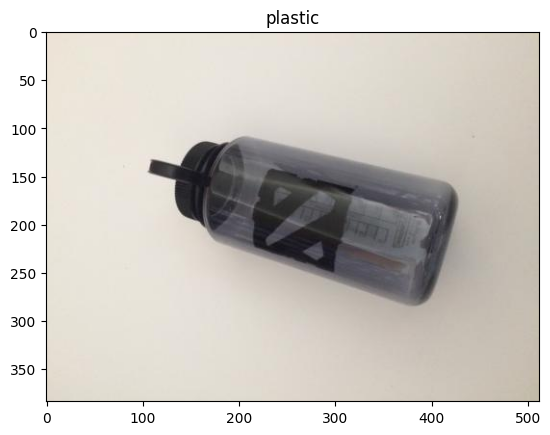

Processing category: trash


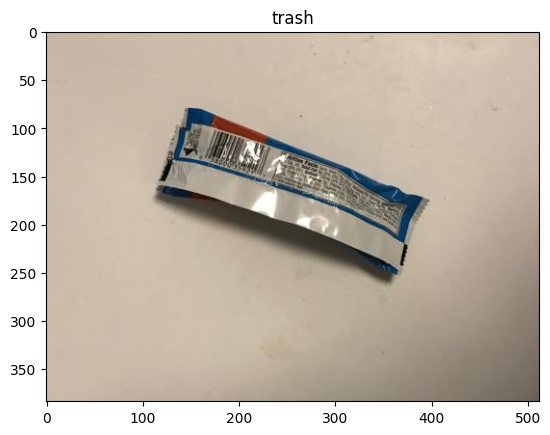

Processing category: cardboard


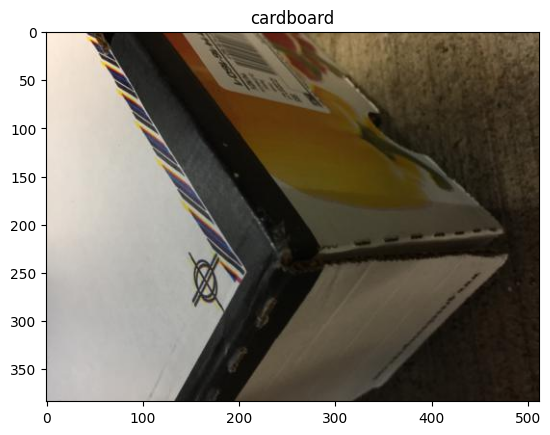

Processing category: metal


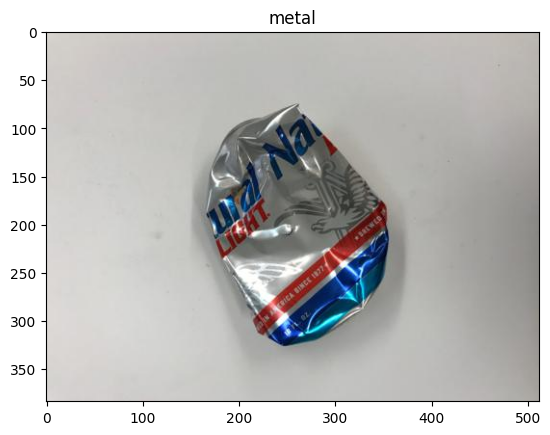

Processing category: glass


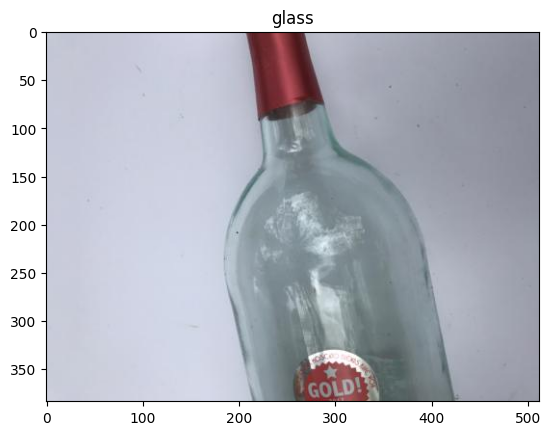

Processing category: paper


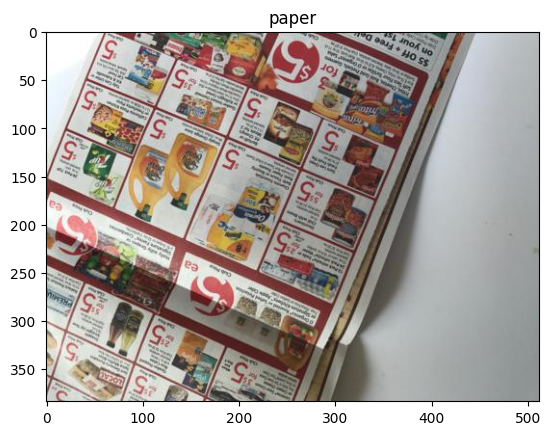

In [42]:
#See all Categories and first ex.

Categories = os.listdir(data_dir)

for category in Categories:
    path = os.path.join(data_dir, category)
    if not os.path.exists(path):
        print(f"The directory {path} does not exist. Skipping category {category}.")
        continue
    print(f"Processing category: {category}")
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.title(category)
        plt.show()
        break

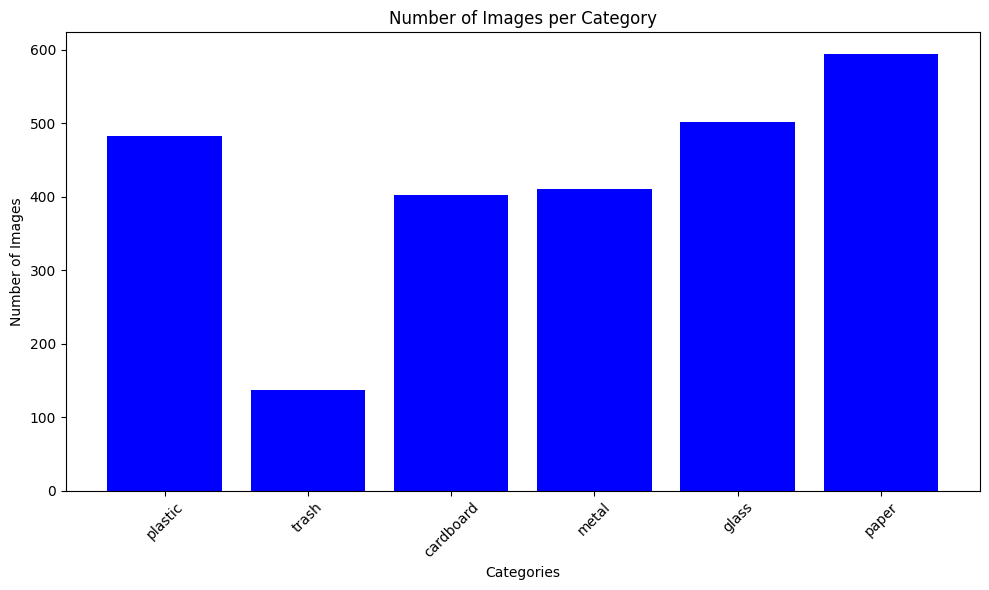

In [43]:
# How many pıc they have on each categorıes
category_counts = defaultdict(int)
for category in Categories:
    path = os.path.join(data_dir, category)
    if not os.path.exists(path):
        print(f"The directory {path} does not exist. Skipping category {category}.")
        continue
    category_counts[category] = len(os.listdir(path))

# Graph
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='blue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
#training
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode='int',
  subset="training",
  seed = 1227,
  image_size=(224, 224),
  batch_size=32)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [45]:
#validation
valid_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode='int',
  subset="validation",
  seed = 1227,
  image_size=(224, 224),
  batch_size=32)


Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [46]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


In [47]:
#spreate the batch for test and validation
val_batches = tf.data.experimental.cardinality(valid_ds)
val_batches = tf.data.experimental.cardinality(valid_ds)
test_ds = valid_ds.take(val_batches // 5)
valid_ds = valid_ds.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(valid_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of validation batches: 13
Number of test batches: 3


In [48]:
'''
The `prefetch` function makes TensorFlow's data pipeline more efficient.
It prepares data in the background during training, allowing the model to continuously work with data and ensuring a smooth training process. With `AUTOTUNE`,
it automatically optimizes the buffer size, accelerating data loading and processing.
Buffer Size: It is the size of the memory space used to temporarily store data.
'''

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:

# Use data augmentation to add more data for training
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

'''
# Data augmentation operations
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normalize
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomZoom(0.2)
])
'''
# Define the path to your dataset
data_directory = "/content/drive/MyDrive/dataset/dataset-resized"


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    image_size=(224, 224),
    batch_size=32,
    label_mode=None
)

# Get the first batch
image_batch = next(iter(dataset))
image = image_batch[0]  # Select the first image in the batch

# Generate augmented images
augmented_images = [
    data_augmentation(tf.expand_dims(image, 0))[0].numpy() for _ in range(5)
]

# Function to plot images
def plot_images(images, titles=None):
    plt.figure(figsize=(15, 15))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis('off')
        if titles:
            plt.title(titles[i])
    plt.show()

# Display the images
plot_images(
    [image.numpy()] + augmented_images,
    titles=['Original Image'] + [f'Augmented Image {i+1}' for i in range(5)]
)


In [50]:
inputs = tf.keras.Input(shape=(224, 224, 3))
# Choose a pre-trained model to use as the basis for transfer learning
base_model = tf.keras.applications.ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)


model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.001
# Compile the model with a loss function and an optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

base_model.summary()


Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,370,944 (222.67 MB)

In [51]:
#
initial_epochs = 10

In [52]:
callbacks_list = [ModelCheckpoint(filepath='model.keras', monitor='val_accuracy',
                                   verbose=1, save_best_only=True, save_weights_only=False, mode='max')]
csv_logger = CSVLogger('modeltraining.log', separator=',', append=False)

# Train the model on the training set
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=(valid_ds),
                    callbacks=(callbacks_list+[csv_logger]))


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5522 - loss: 20.7287 
Epoch 1: val_accuracy improved from -inf to 0.78729, saving model to model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 1203s 18s/step - accuracy: 0.5536 - loss: 20.7033 - val_accuracy: 0.7873 - val_loss: 15.5489
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7947 - loss: 14.2768 
Epoch 2: val_accuracy did not improve from 0.78729
64/64 ━━━━━━━━━━━━━━━━━━━━ 1199s 18s/step - accuracy: 0.7948 - loss: 14.2573 - val_accuracy: 0.7848 - val_loss: 10.4573
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.8226 - loss: 9.4103 
Epoch 3: val_accuracy improved from 0.78729 to 0.83130, saving model to model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 1133s 18s/step - accuracy: 0.8226 - loss: 9.3971 - val_accuracy: 0.8313 - val_loss: 6.8645
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8197 - loss: 6.2840 
Epoch 4: val_accuracy improved from 0.83130 to 0.83374, saving model to model.keras


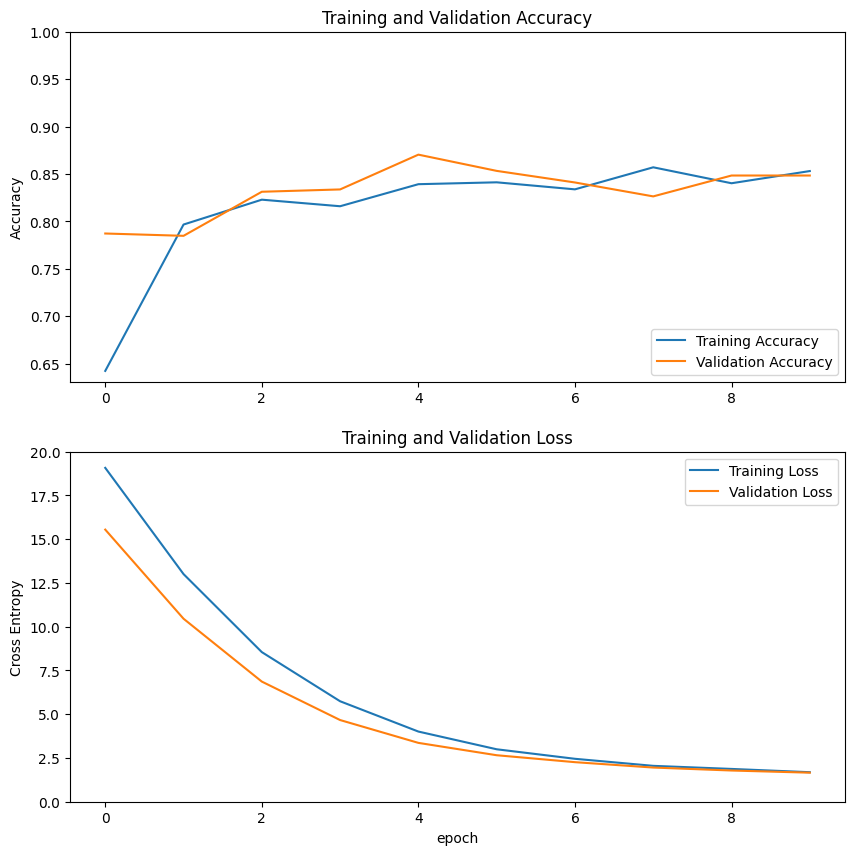

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,20.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [54]:
'''
base_model.trainable = True
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()
'''

"\nbase_model.trainable = True\nmodel.compile(loss='sparse_categorical_crossentropy',\n              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),\n              metrics=['accuracy'])\n\nmodel.summary()\n"

In [55]:
'''
from tensorflow.keras.callbacks import EarlyStopping

# creat early stoppıng
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=10,
                               restore_best_weights=True)

# addto other call back lıst
callbacks_list = [early_stopping, csv_logger]  # csv_logger already ın the call back

# Fine-tune the model on the training set
history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=valid_ds,
                         callbacks=callbacks_list)  # callback
'''

"\nfrom tensorflow.keras.callbacks import EarlyStopping\n\n# creat early stoppıng\nearly_stopping = EarlyStopping(monitor='val_accuracy',\n                               patience=10,\n                               restore_best_weights=True)\n\n# addto other call back lıst\ncallbacks_list = [early_stopping, csv_logger]  # csv_logger already ın the call back\n\n# Fine-tune the model on the training set\nhistory_fine = model.fit(train_ds,\n                         epochs=total_epochs,\n                         initial_epoch=history.epoch[-1],\n                         validation_data=valid_ds,\n                         callbacks=callbacks_list)  # callback\n"

In [56]:
# best model save

model.save('best_model.keras')


In [57]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(test_ds)
print('Validation loss: {}, Validation accuracy: {}'.format(val_loss, val_acc))

3/3 ━━━━━━━━━━━━━━━━━━━━ 52s 18s/step - accuracy: 0.7878 - loss: 1.7892
Validation loss: 1.7230638265609741, Validation accuracy: 0.8020833134651184


In [ ]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

plt.figure(figsize=(12, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    actual_label = class_names[label_batch[i]]
    predicted_label = class_names[np.argmax(predictions[i])]
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis("off")

# Adjust the space between the plots
plt.subplots_adjust(wspace=1, hspace=0.5)

plt.show()